<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana11/MultiLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/DatosRegresion.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/DatosRegresion.csv'

In [3]:
data = pd.read_csv(file,sep=',')
data.keys()

Index(['X0', 'X1', 'Y'], dtype='object')

In [4]:
X = np.array(data[['X0','X1']])
Y = np.array(data['Y'])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

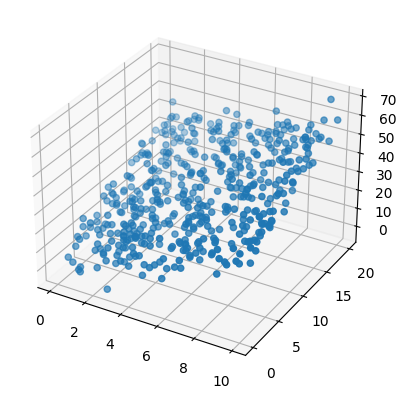

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

In [7]:
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size=0.2)

In [13]:
# Modelo
Model = LinearRegression()
Model.fit(XTrain,YTrain)

LinearRegression()

In [14]:
param = np.array([Model.intercept_,Model.coef_[0],Model.coef_[1]])
param

array([3.43924216, 2.45402816, 1.51595961])

In [10]:
x0 = np.linspace(min(X[:,0]),max(X[:,0]),100)
x1 = np.linspace(min(X[:,1]),max(X[:,1]),100)

In [11]:
X0grid, X1grid = np.meshgrid(x0,x1)
Ygrid = param[0] + param[1]*X0grid + param[2]*X1grid

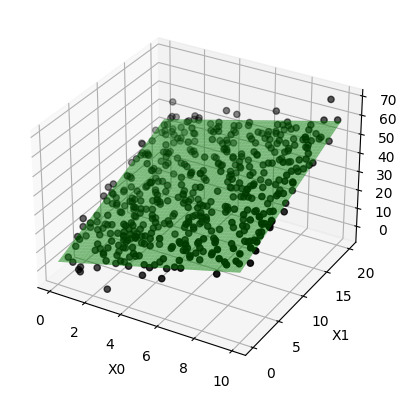

In [16]:

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y,color='k')
ax.plot_surface(X0grid,X1grid,Ygrid,color='g',alpha=0.5)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [19]:
N = X.shape[0]
n = 3
A = np.ones((N,n))
A[:,1] = X[:,0]
A[:,2] = X[:,1]

b = np.array(Y)

AT = np.dot(A.T,A)
bT = np.dot(A.T,b)

param1 = np.linalg.solve(AT,bT)
param1

array([3.24858768, 2.49270369, 1.50623543])

In [20]:
param

array([3.43924216, 2.45402816, 1.51595961])